In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 99999)

In [ ]:
url='https://drive.google.com/file/d/1HwPu8Uo3jPcZTELuQEzovELrfuR0_QLc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df_numerized = df

for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,24,658,998,36,1,403800,29,5.0,16639.0,43,1,7202,20500.0,21500.0,1775
1,2015,24,658,998,36,1,403792,29,5.0,9393.0,43,0,7202,20800.0,21500.0,1775
2,2014,3,9,283,37,1,507008,29,45.0,1331.0,33,1,4978,31900.0,30000.0,1163
3,2015,51,596,1399,37,1,546651,29,41.0,14282.0,43,1,13795,27500.0,27750.0,1258
4,2014,3,42,498,37,1,508041,29,43.0,2641.0,33,1,4978,66000.0,67000.0,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,24,388,1052,37,-1,488920,35,45.0,18255.0,41,1,1536,35300.0,33000.0,1296
558833,2012,41,7,1109,11,1,289636,62,5.0,54393.0,43,1,6466,30200.0,30800.0,3311
558834,2012,3,743,1945,36,1,398254,29,48.0,50561.0,27,1,4978,29800.0,34000.0,3311
558835,2015,36,76,120,78,1,192494,32,38.0,16658.0,43,1,4606,15100.0,11100.0,1295


In [ ]:
correlation_matrix = df_numerized.corr()

correlation_matrix

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
year,1.000000,-0.004715,-0.022511,0.094578,0.110958,-0.033856,-0.013806,0.021518,0.340320,-0.772737,0.061370,-0.221372,0.001966,0.596631,0.586480,0.025839
make,-0.004715,1.000000,0.133634,-0.006804,0.061650,-0.002716,0.323139,-0.029885,0.033642,-0.027289,-0.000911,0.000458,0.158269,-0.062881,-0.061171,0.023493
model,-0.022511,0.133634,1.000000,0.189037,0.029374,-0.012917,0.089294,0.018894,-0.010233,0.040049,0.002169,0.010460,0.039170,-0.000916,-0.000781,-0.006974
trim,0.094578,-0.006804,0.189037,1.000000,0.063316,0.010858,-0.232278,0.044101,0.020810,-0.042879,0.020493,0.002982,-0.041250,0.055830,0.053362,-0.001645
body,0.110958,0.061650,0.029374,0.063316,1.000000,-0.039581,-0.000298,0.016130,0.041353,-0.063565,-0.002796,-0.028941,0.020228,0.002721,0.004564,0.065720
transmission,-0.033856,-0.002716,-0.012917,0.010858,-0.039581,1.000000,0.002449,-0.157937,-0.009376,0.026601,0.009271,0.003283,0.007633,-0.054461,-0.052555,0.198737
vin,-0.013806,0.323139,0.089294,-0.232278,-0.000298,0.002449,1.000000,-0.066985,0.062145,-0.052349,-0.063079,-0.016823,0.075935,0.114304,0.113950,0.006675
state,0.021518,-0.029885,0.018894,0.044101,0.016130,-0.157937,-0.066985,1.000000,0.024957,-0.010146,-0.000803,0.037809,0.010521,0.014042,0.010367,0.043061
condition,0.340320,0.033642,-0.010233,0.020810,0.041353,-0.009376,0.062145,0.024957,1.000000,-0.318188,0.033474,-0.082348,-0.003344,0.281415,0.321944,0.009934
odometer,-0.772737,-0.027289,0.040049,-0.042879,-0.063565,0.026601,-0.052349,-0.010146,-0.318188,1.000000,-0.030240,0.190825,0.000615,-0.588113,-0.582393,-0.002876


<Axes: >

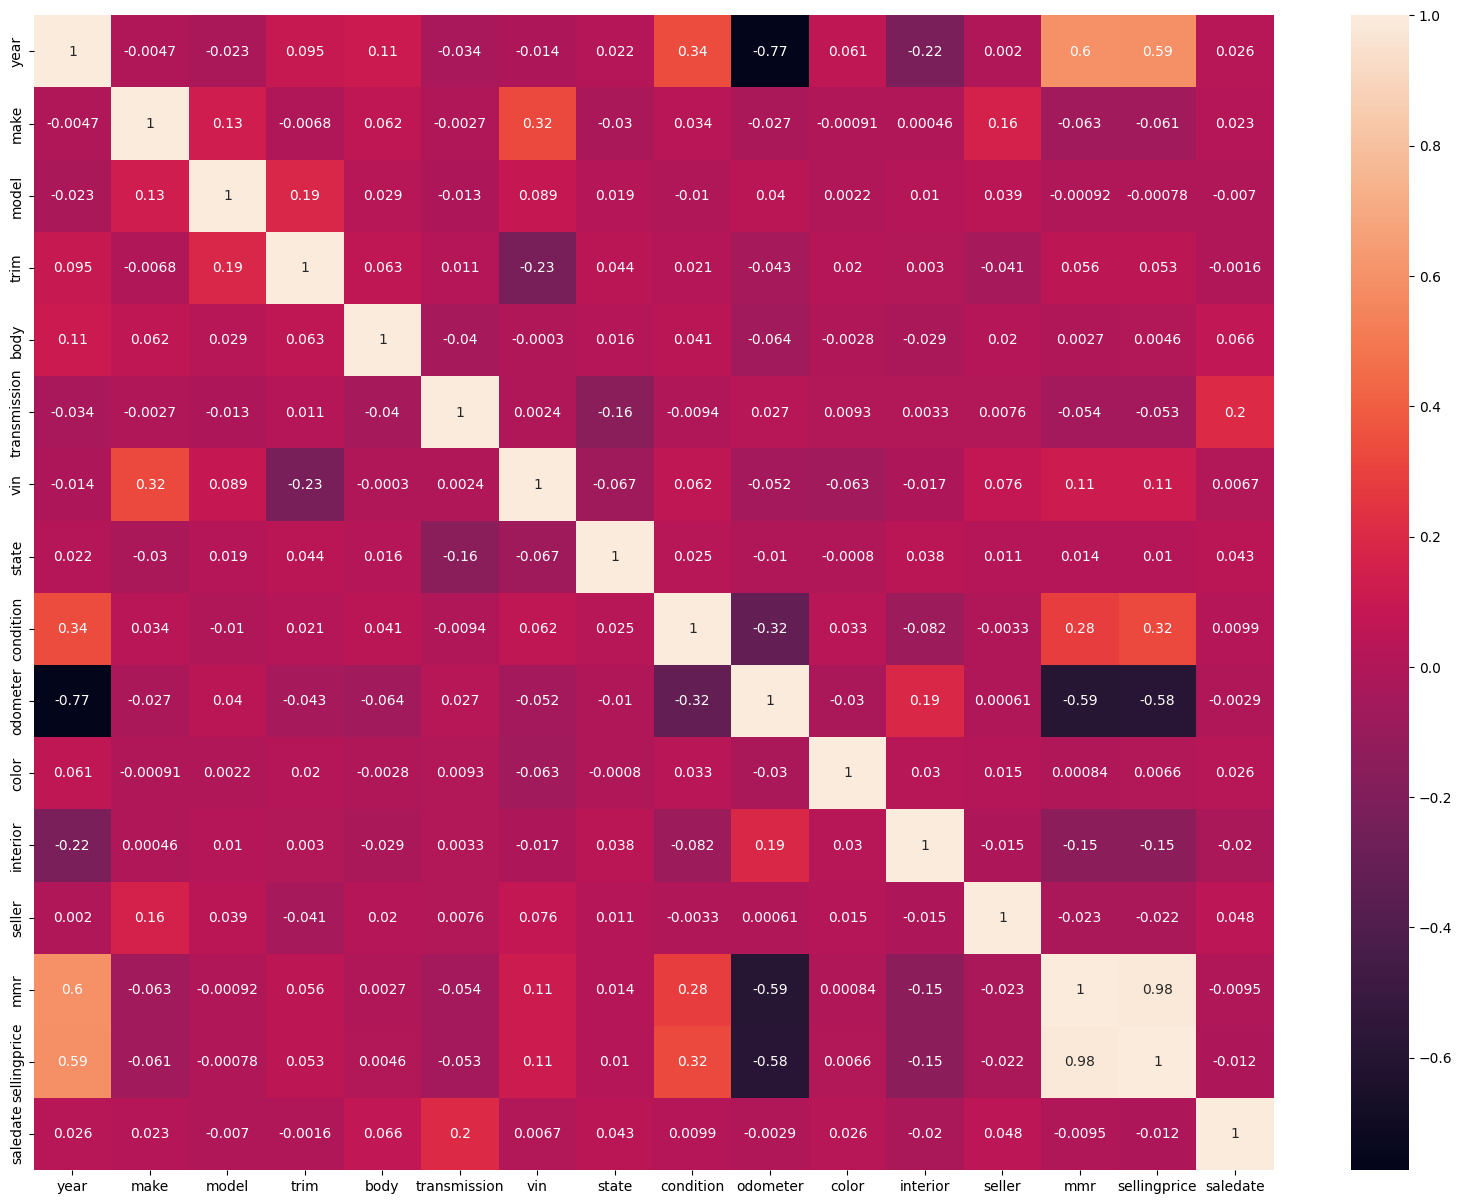

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlation_matrix, annot = True)

In [ ]:
corr_pairs = correlation_matrix.unstack()

corr_pairs

year          year            1.000000
              make           -0.004715
              model          -0.022511
              trim            0.094578
              body            0.110958
              transmission   -0.033856
              vin            -0.013806
              state           0.021518
              condition       0.340320
              odometer       -0.772737
              color           0.061370
              interior       -0.221372
              seller          0.001966
              mmr             0.596631
              sellingprice    0.586480
              saledate        0.025839
make          year           -0.004715
              make            1.000000
              model           0.133634
              trim           -0.006804
              body            0.061650
              transmission   -0.002716
              vin             0.323139
              state          -0.029885
              condition       0.033642
              odometer   

In [ ]:
sorted_corr = corr_pairs.sort_values()

sorted_corr

odometer      year           -0.772737
year          odometer       -0.772737
mmr           odometer       -0.588113
odometer      mmr            -0.588113
              sellingprice   -0.582393
sellingprice  odometer       -0.582393
condition     odometer       -0.318188
odometer      condition      -0.318188
vin           trim           -0.232278
trim          vin            -0.232278
year          interior       -0.221372
interior      year           -0.221372
state         transmission   -0.157937
transmission  state          -0.157937
sellingprice  interior       -0.148464
interior      sellingprice   -0.148464
mmr           interior       -0.147884
interior      mmr            -0.147884
condition     interior       -0.082348
interior      condition      -0.082348
vin           state          -0.066985
state         vin            -0.066985
odometer      body           -0.063565
body          odometer       -0.063565
color         vin            -0.063079
vin           color      

In [ ]:
high_corr = sorted_corr[(sorted_corr)>0.5]

high_corr

year          sellingprice    0.586480
sellingprice  year            0.586480
mmr           year            0.596631
year          mmr             0.596631
mmr           sellingprice    0.983635
sellingprice  mmr             0.983635
year          year            1.000000
mmr           mmr             1.000000
seller        seller          1.000000
interior      interior        1.000000
color         color           1.000000
odometer      odometer        1.000000
condition     condition       1.000000
state         state           1.000000
vin           vin             1.000000
transmission  transmission    1.000000
body          body            1.000000
trim          trim            1.000000
model         model           1.000000
make          make            1.000000
sellingprice  sellingprice    1.000000
saledate      saledate        1.000000
dtype: float64

Text(0.5, 1.0, 'year vs selling price')

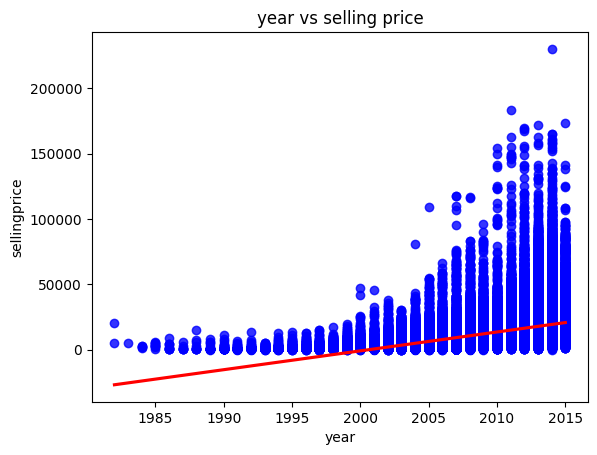

In [ ]:
sns.regplot(x='year',y='sellingprice',data=df_numerized,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('year vs selling price')

Text(0.5, 1.0, 'year vs Manheim Market Report')

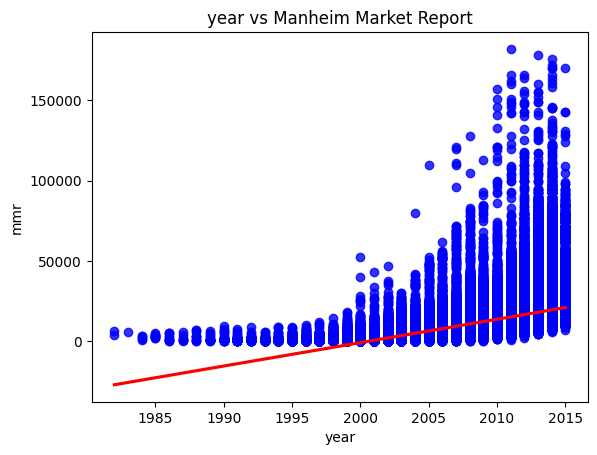

In [ ]:
sns.regplot(x='year',y='mmr',data=df_numerized,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('year vs Manheim Market Report')

Text(0.5, 1.0, 'Manheim Market Report vs Selling Price')

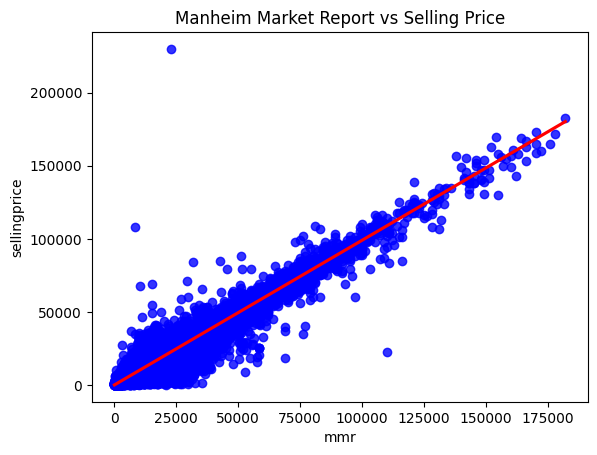

In [ ]:
sns.regplot(x='mmr',y='sellingprice',data=df_numerized,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Manheim Market Report vs Selling Price')

In [ ]:
#year and manheim market report has the highest correlation to car seling price